In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('IAP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [7]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
669,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
670,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
671,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y = df.iloc[:,-1]
Y


0      6.161151
1      5.036212
2      5.328827
3      6.075721
4      4.698970
         ...   
668    6.935542
669    7.397940
670    6.821023
671    7.096910
672    6.575118
Name: pIC50, Length: 673, dtype: float64

### **3.3. Let's examine the data dimension**

In [9]:
X.shape

(673, 881)

In [10]:
Y.shape

(673,)

### **3.4. Remove low variance features**

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)


In [12]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)

    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [13]:
X.shape

(673, 103)

In [14]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [16]:
ddf=pd.DataFrame(X)

In [17]:
ddf.to_csv('descriptor_list.csv', index = False)

## **4. Data split (80/20 ratio)**

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((538, 103), (538,))

In [20]:
X_test.shape, Y_test.shape

((135, 103), (135,))

## **pca**

> Indented block



In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X)


In [22]:
X_pca.shape

(538, 3)

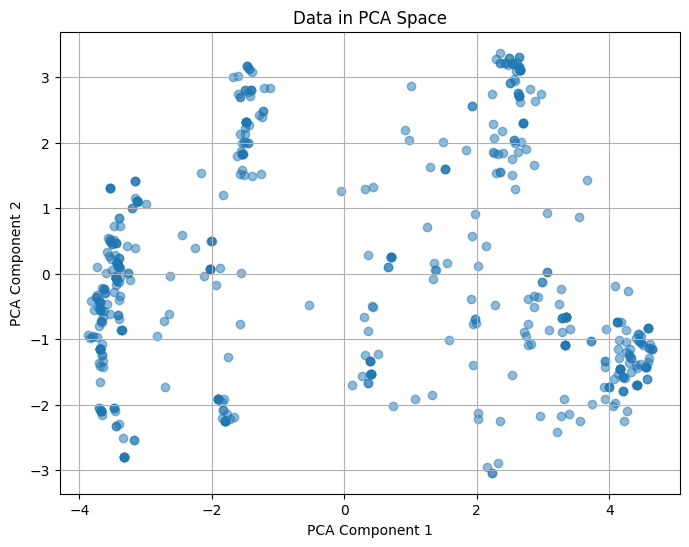

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
merged_data_reduced= pca.fit_transform(X)


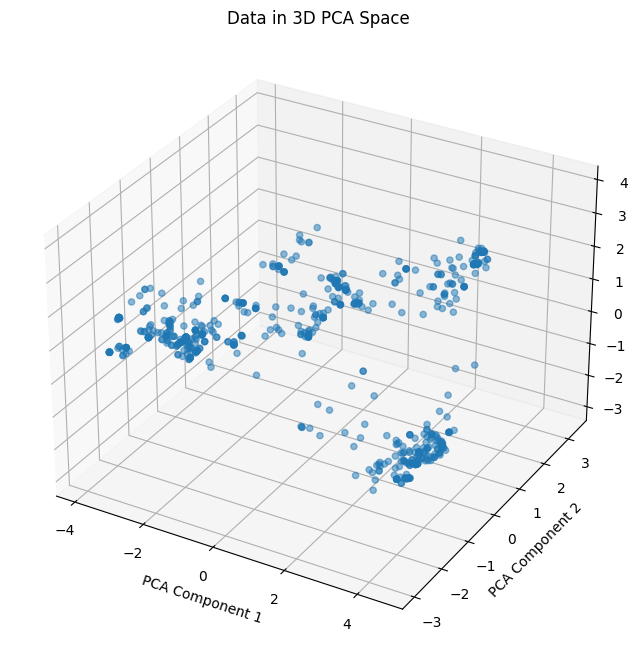

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality
from sklearn.decomposition import PCA

# Assuming you already have performed PCA and stored the results in merged_data_reduced with 3 components

# Plot the data in 3D PCA space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting PCA components
x = merged_data_reduced[:, 0]
y = merged_data_reduced[:, 1]
z = merged_data_reduced[:, 2]

# Scatter plot in 3D
ax.scatter(x, y, z, alpha=0.5)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Data in 3D PCA Space')
plt.show()


## **5. Building a Regression Model using Random Forest**

In [26]:
model = RandomForestRegressor(n_estimators=500 , random_state= 42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5022300215748544

In [27]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

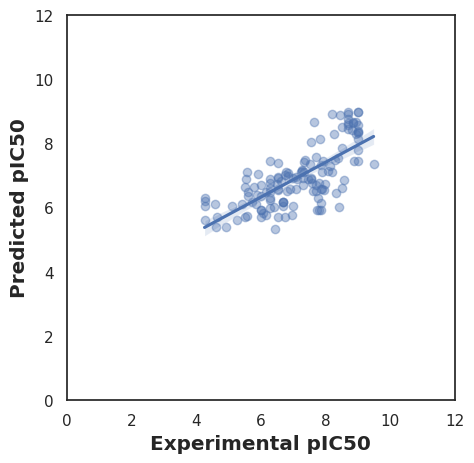

In [34]:
 import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Text(0, 0.5, 'Y predict')

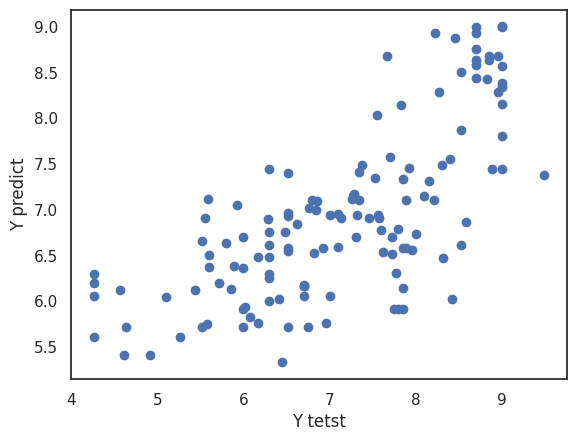

In [35]:
plt.scatter(Y_test , Y_pred)
plt.xlabel('Y tetst')
plt.ylabel('Y predict')

In [36]:
Y.mean()

7.168382545727933

In [37]:
from sklearn import metrics
import numpy as np
print("mae:  " , metrics.mean_absolute_error(Y_test , Y_pred) )
print('mse: '    ,  metrics.mean_squared_error(Y_test , Y_pred))
print(' rmse ' ,  np.sqrt(metrics.mean_squared_error(Y_test , Y_pred)))

mae:   0.6936942779743177
mse:  0.7937064241035624
 rmse  0.8909020283418163


<ipython-input-38-843fa30ff3fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-Y_pred) , bins = 50)


<Axes: xlabel='pIC50', ylabel='Density'>

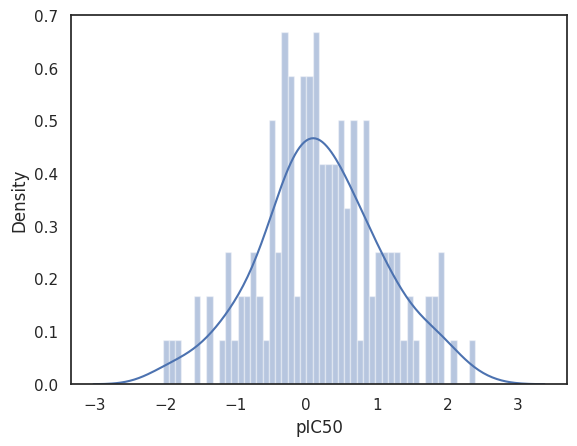

In [38]:
sns.distplot((Y_test-Y_pred) , bins = 50)

In [ ]:
pip install joblib


In [ ]:
 import joblib

joblib.dump(model_pca, 'r2_with_pca.pkl')


In [ ]:
joblib.dump( model , 'model_without_pca.pkl')

# checking for removed features **bold text**

In [ ]:
X

In [ ]:


c = pd.read_csv('PAI-1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
c

In [ ]:
not_removed = []

for colx in X.columns:
    if colx in c.columns:
        not_removed.append(colx)

not_removed


In [ ]:
import pandas as pd


not_removed_series = pd.Series(not_removed)




not_removed_series.to_csv('not_removed_features.csv', index=False)


In [ ]:
not_removed_series

## **model saving **

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_asli.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)


# **f1 score and etc:**

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [ ]:
type(Y_test)

pandas.core.series.Series

In [ ]:
Y_test_np = Y_test.to_numpy()


In [ ]:
cm= confusion_matrix(Y_test_np , Y_pred )
cm

ValueError: continuous is not supported